# **🔍👩🏻‍💻Job Listing Web Scraping Project👩🏻‍💻🔍**

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://realpython.github.io/fake-jobs/"

response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

titles = []
companies = []
locations = []
dates = []
links = []

jobs = soup.find_all("div", class_="card-content")

for job in jobs:
    title = job.find("h2", class_="title").text.strip()
    company = job.find("h3", class_="company").text.strip()
    location = job.find("p", class_="location").text.strip()
    date = job.find("time")["datetime"]
    apply_link = job.find_next("a", class_="card-footer-item")["href"]

    titles.append(title)
    companies.append(company)
    locations.append(location)
    dates.append(date)
    links.append(apply_link)

df = pd.DataFrame({
    "Job Title": titles,
    "Company": companies,
    "Location": locations,
    "Date Posted": dates,
    "Apply Link": links
})

df.to_csv("job_listings.csv", index=False)
print("Scraped", len(df), "jobs and saved to job_listings.csv")
print(df.head(10))


Scraped 100 jobs and saved to job_listings.csv
                   Job Title                     Company  \
0    Senior Python Developer    Payne, Roberts and Davis   
1            Energy engineer            Vasquez-Davidson   
2            Legal executive  Jackson, Chambers and Levy   
3     Fitness centre manager              Savage-Bradley   
4            Product manager                 Ramirez Inc   
5  Medical technical officer                Rogers-Yates   
6    Physiological scientist                Kramer-Klein   
7           Textile designer              Meyers-Johnson   
8   Television floor manager             Hughes-Williams   
9   Waste management officer   Jones, Williams and Villa   

                Location Date Posted                  Apply Link  
0        Stewartbury, AA  2021-04-08  https://www.realpython.com  
1   Christopherville, AA  2021-04-08  https://www.realpython.com  
2    Port Ericaburgh, AA  2021-04-08  https://www.realpython.com  
3      East Seanview, AP

In [3]:
# Most common job titles
print("\n Top 5 Most Common Job Titles:")
print(df['Job Title'].value_counts().head())

# Companies posting most jobs
print("\n Top 5 Companies Hiring:")
print(df['Company'].value_counts().head())

# Locations with most jobs
print("\n Top 5 Locations:")
print(df['Location'].value_counts().head())


 Top 5 Most Common Job Titles:
Job Title
Python Programmer (Entry-Level)    3
Legal executive                    2
Materials engineer                 2
Software Developer (Python)        2
Manufacturing systems engineer     2
Name: count, dtype: int64

 Top 5 Companies Hiring:
Company
Garcia PLC                    2
Vasquez-Davidson              1
Payne, Roberts and Davis      1
Jackson, Chambers and Levy    1
Savage-Bradley                1
Name: count, dtype: int64

 Top 5 Locations:
Location
Stewartbury, AA         1
Christopherville, AA    1
Port Ericaburgh, AA     1
East Seanview, AP       1
North Jamieview, AP     1
Name: count, dtype: int64


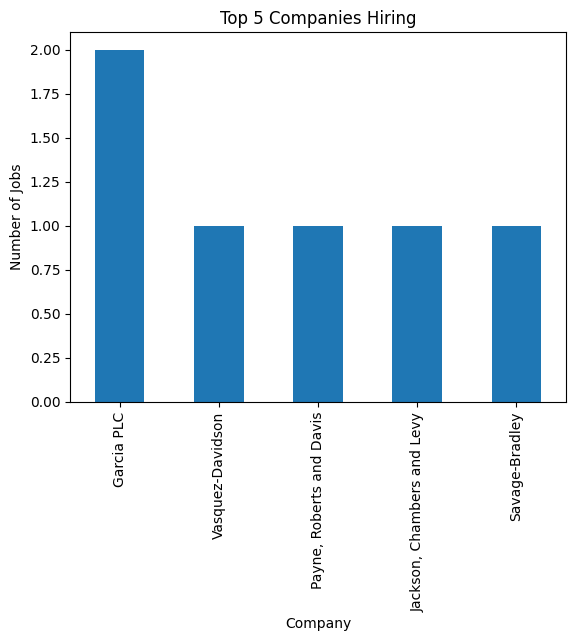

In [4]:
import matplotlib.pyplot as plt

df['Company'].value_counts().head(5).plot(kind='bar')
plt.title('Top 5 Companies Hiring')
plt.xlabel('Company')
plt.ylabel('Number of Jobs')
plt.show()